# Linear Regression Model for Predicting Aircraft Taxi Time

In [1]:
# load data
import pandas as pd
import numpy as np
df=pd.read_csv("aircraft.csv")

In [2]:
# take a look at the raw data (Data Table in Orange)
df

,depArr,distance,distance_long,operation_mode,angle_sum,NDepDep,NDepArr,NArrDep,NArrArr,Pressure,VisibilityInMeters,isRain,isSnow,flightNumber,airline,aircraftModel,AvgSpdLast10,TaxiTime
0,0,2815.376892,1417.437268,1,873.74,4,0,0,0,30.15,6000,0,0,TK1994,THY,A321,238.776244,17.200000
1,0,1612.045476,1169.957521,1,494.78,2,0,0,0,30.15,6000,0,0,SN2174,BEL,A319,268.150889,13.883333
2,1,1311.209416,0.000000,1,514.56,0,0,0,0,30.18,9000,1,0,PK721,PIA,B77L,330.556996,3.966667
3,1,2079.607054,0.000000,1,664.49,0,0,0,0,30.12,10000,0,0,A3638,AEE,A320,331.262804,9.266667
4,0,1129.205020,822.871797,1,551.01,1,0,0,0,30.15,6000,0,0,KL1082,KLM,B738,273.926372,11.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,0,1009.294221,756.386082,1,533.89,3,2,0,0,30.24,10000,0,0,FR561,RYR,B738,318.115097,8.066667
3014,1,1354.652094,0.000000,1,309.99,0,0,0,0,30.24,10000,0,0,EW1344,EWG,A320,198.535773,7.283333
3015,0,2859.924948,1417.437268,1,891.62,3,0,0,0,30.24,10000,0,0,ZB654,MON,A321,292.353350,12.100000
3016,1,1938.292575,1020.312594,1,488.09,0,0,4,1,30.24,10000,0,0,FR37,RYR,B738,148.911978,3.783333


In [3]:
# data types and summary stats...
# "include=all" is needed to include all columns, otherwise we'll just get stats for numeric ones
# here, we can see that depArr has 4 values (a little suspicous); operation_mode has a mean of 1.0 std (standard deviation) of 0.0, and min/max of 1.0, so it's all 1 value.
df.describe(include="all")

,depArr,distance,distance_long,operation_mode,angle_sum,NDepDep,NDepArr,NArrDep,NArrArr,Pressure,VisibilityInMeters,isRain,isSnow,flightNumber,airline,aircraftModel,AvgSpdLast10,TaxiTime
count,3018,3018.000000,3018.000000,3018.0,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,2957,3006,3018,3018.000000,3018.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,658,52,34,NaN,NaN
top,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR3501,RYR,B738,NaN,NaN
freq,2140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,653,927,NaN,NaN
mean,NaN,1924.581844,941.184434,1.0,542.495480,1.294566,0.164679,0.402584,0.069251,29.907956,9686.514248,0.160371,0.001657,NaN,NaN,NaN,250.557053,9.794489
std,NaN,640.659622,527.650186,0.0,184.749681,1.457966,0.435100,1.012985,0.278810,0.279243,1074.571413,0.367011,0.040676,NaN,NaN,NaN,56.426977,5.695913
min,NaN,355.282084,0.000000,1.0,89.970000,0.000000,0.000000,0.000000,0.000000,29.230000,2200.000000,0.000000,0.000000,NaN,NaN,NaN,97.656837,0.366667
25%,NaN,1560.752463,655.085138,1.0,412.260000,0.000000,0.000000,0.000000,0.000000,29.680000,10000.000000,0.000000,0.000000,NaN,NaN,NaN,211.996491,5.604167
50%,NaN,1899.756794,977.407659,1.0,524.240000,1.000000,0.000000,0.000000,0.000000,29.940000,10000.000000,0.000000,0.000000,NaN,NaN,NaN,246.253041,9.166667
75%,NaN,2422.271051,1358.082550,1.0,651.060000,2.000000,0.000000,0.000000,0.000000,30.180000,10000.000000,0.000000,0.000000,NaN,NaN,NaN,283.505081,13.033333


In [4]:
# count the nulls/missing data in each column
# not too bad - we might need to fill/delete these rows later
df.isnull().sum()

depArr                 0
distance               0
distance_long          0
operation_mode         0
angle_sum              0
NDepDep                0
NDepArr                0
NArrDep                0
NArrArr                0
Pressure               0
VisibilityInMeters     0
isRain                 0
isSnow                 0
flightNumber          61
airline               12
aircraftModel          0
AvgSpdLast10           0
TaxiTime               0
dtype: int64

array([[<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'distance_long'}>,
        <AxesSubplot:title={'center':'operation_mode'}>,
        <AxesSubplot:title={'center':'angle_sum'}>],
       [<AxesSubplot:title={'center':'NDepDep'}>,
        <AxesSubplot:title={'center':'NDepArr'}>,
        <AxesSubplot:title={'center':'NArrDep'}>,
        <AxesSubplot:title={'center':'NArrArr'}>],
       [<AxesSubplot:title={'center':'Pressure'}>,
        <AxesSubplot:title={'center':'VisibilityInMeters'}>,
        <AxesSubplot:title={'center':'isRain'}>,
        <AxesSubplot:title={'center':'isSnow'}>],
       [<AxesSubplot:title={'center':'AvgSpdLast10'}>,
        <AxesSubplot:title={'center':'TaxiTime'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

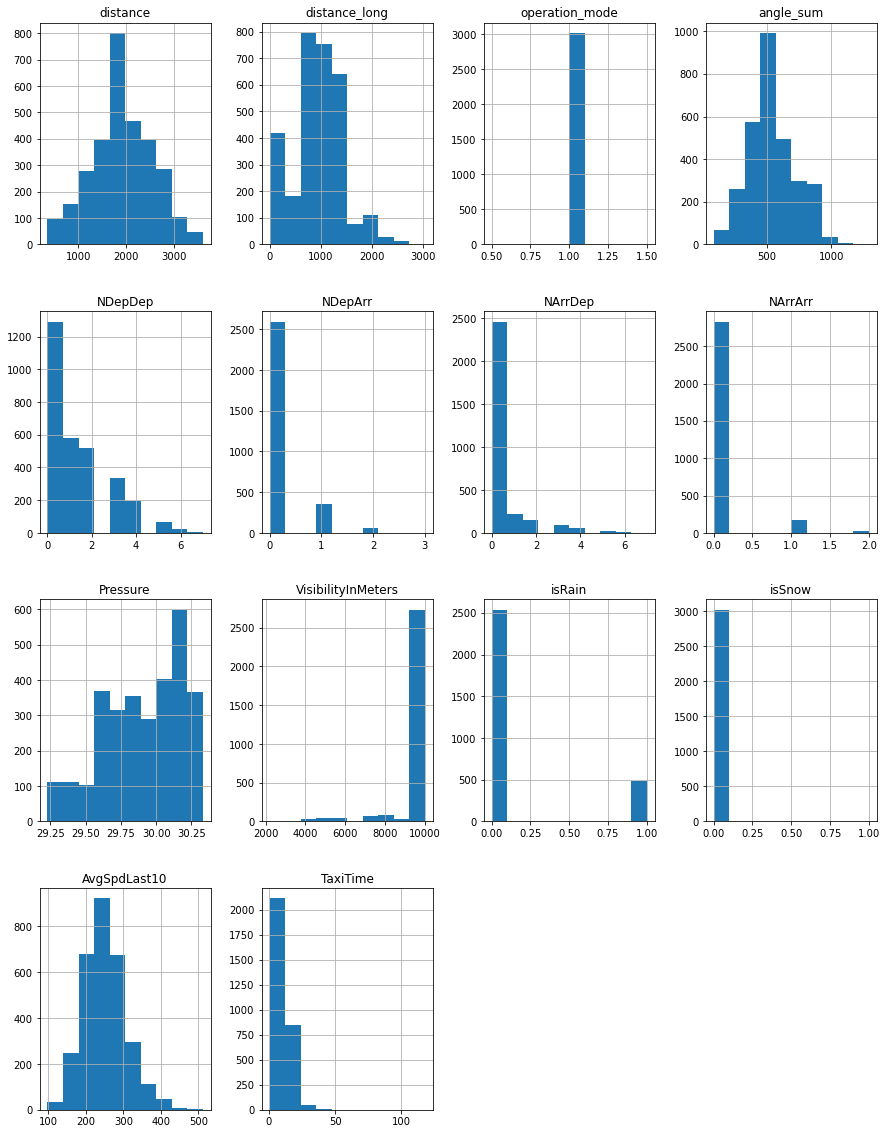

In [5]:
# Plot distributions...
df.hist(figsize = (15,20))

<AxesSubplot:>

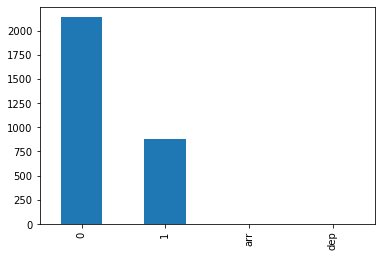

In [6]:
#...okay, we can see some issues with these distributions. Can you spot them?

# NOTE: we are also missing some variables. Those are
# the non-numeric ones: depArr; flightNumber; airline; aircraftModel
# There's not really an easy way to handle these,
# so we'll try a bar plot one at a time for them:
df['depArr'].value_counts().plot(kind='bar')

depArr


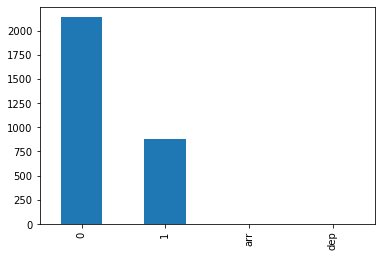

flightNumber


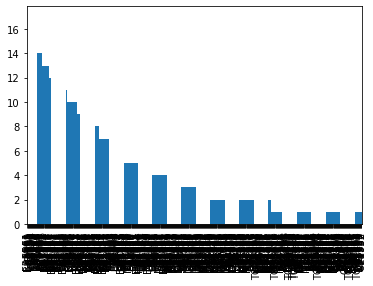

airline


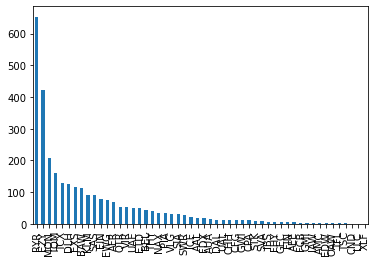

aircraftModel


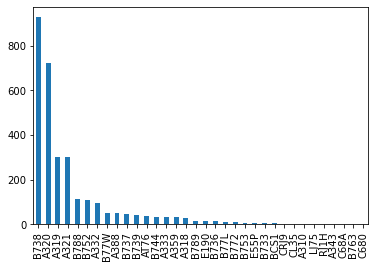

In [7]:
# this will list the non-numeric columns...
#df.select_dtypes(include=object)

# so loop over all of them; count each unique value, and plot...
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=object).columns: 
    print(col)
    df[col].value_counts().plot(kind='bar')
    plt.show()

In [8]:
# at this point we can discard obviously useless variables.
# I've chosen flightNumber, airline and aircraftModel - can you think why?
#
# We might also use some other feature ranking approaches; having settled on
# our desired features, we select them by just referring to the data frame 
# using a list of the features names we want:

# define the list
selected_features = ['depArr', 'distance', 'distance_long', 'angle_sum',
       'NDepDep', 'NDepArr', 'NArrDep', 'NArrArr', 'Pressure',
       'isRain', 'isSnow', 'AvgSpdLast10']

# how to use it
df[selected_features]

,depArr,distance,distance_long,angle_sum,NDepDep,NDepArr,NArrDep,NArrArr,Pressure,isRain,isSnow,AvgSpdLast10
0,0,2815.376892,1417.437268,873.74,4,0,0,0,30.15,0,0,238.776244
1,0,1612.045476,1169.957521,494.78,2,0,0,0,30.15,0,0,268.150889
2,1,1311.209416,0.000000,514.56,0,0,0,0,30.18,1,0,330.556996
3,1,2079.607054,0.000000,664.49,0,0,0,0,30.12,0,0,331.262804
4,0,1129.205020,822.871797,551.01,1,0,0,0,30.15,0,0,273.926372
...,...,...,...,...,...,...,...,...,...,...,...,...
3013,0,1009.294221,756.386082,533.89,3,2,0,0,30.24,0,0,318.115097
3014,1,1354.652094,0.000000,309.99,0,0,0,0,30.24,0,0,198.535773
3015,0,2859.924948,1417.437268,891.62,3,0,0,0,30.24,0,0,292.353350
3016,1,1938.292575,1020.312594,488.09,0,0,4,1,30.24,0,0,148.911978


# Data Preparation
Now on to cleaning the data...

In [9]:
# train/test split
# we could do this after conversion to numpy arrays
# but it's more convenient to do some of the data cleaning in a DataFrame
# so we'll keep the data in that form for now.
df_copy = df.copy()
df_train = df_copy.sample(frac=0.75, random_state=0)
df_test = df_copy.drop(df_train.index)

<AxesSubplot:>

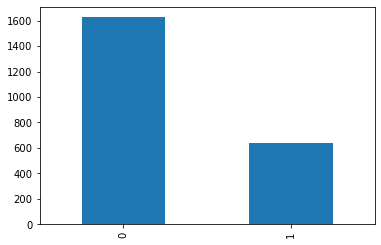

In [10]:
# The histogram showed us depArr had some 'dep' and 'arr' values, which we'll map to 0 and 1
# we can use a dictionary to set up the mapping...
df_train['depArr'] = df_train['depArr'].replace({'dep':'0','arr':'1'})

# just to check it's worked...
df_train['depArr'].value_counts().plot(kind='bar')


In [11]:
# we'll also select only the rows where taxi time is <= 30 mins
df_train=df_train.loc[df_train['TaxiTime'] <= 30]

In [12]:
# now we can map to numpy arrays
X_train = df_train[selected_features].values
y_train = df_train['TaxiTime'].values

In [13]:
# normalise...
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)

In [14]:
X_train

array([[0.        , 0.68947378, 0.40266342, ..., 1.        , 0.        ,
        0.28931283],
       [0.        , 0.23176025, 0.30714377, ..., 0.        , 0.        ,
        0.42823682],
       [0.        , 0.48285776, 0.1981588 , ..., 0.        , 0.        ,
        0.31388959],
       ...,
       [0.        , 0.42987341, 0.21789129, ..., 0.        , 0.        ,
        0.3378819 ],
       [0.        , 0.34575798, 0.33061234, ..., 0.        , 0.        ,
        0.30337793],
       [1.        , 0.3797565 , 0.19210264, ..., 1.        , 0.        ,
        0.57683357]])

# Modelling
On to the modelling stage...

First, we'll try just creating a list of different models, and looping over them, trying each on in turn.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

# make a list of models to try...
# you could have multiple copies of each model to try different hyperparameters here
models = []
models.append(('LR', LinearRegression()))
models.append(('MLP', MLPRegressor(max_iter=500)))
models.append(('RF', RandomForestRegressor()))

# now we loop over the models
# this is the equivalent of test+score in Orange
# this is just a standard "for" loop - you could extend with your own search over features or hyperparameters here
# or replace with e.g. GridSearchCV

seed = 7 # this makes the "random" elements of the training process predictable. You can change it to any integer value see what effect that has.
scoring = 'r2' # we'll be using the r^2 cost function; you can also provide a function here if you want to customise!
results = [] # empty list to store results in
names = [] # empty list to store the names of the model
for name, model in models: # "models" is a list of 2-element lists; for each list in "models", copy the first element into a variable called "name" and the second into a variable called "model"
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed) # kFold is an object that does all the work of splitting the data repeatedly (internally it's a list of split versions of the data, in the form of train/validation pairs)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) # this takes each of the folds of the data in kFold, and trains/validates the model on them. The result is a list of scores - r2 in this case - one score for each fold.
    results.append(cv_results) #We add this list of scores to the "results" list 
    names.append(name) # we add the name of the current model to the "names" list (each item in the names list will match the set of scores in the results list)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # for the current model, print the mean and standard deviation of the scores from all folds
    print(msg)

LR: 0.517162 (0.038724)
MLP: 0.525042 (0.037278)
RF: 0.541090 (0.040626)


That's all fine, but it's a bit annoying to write out all the configurations by hand. We can also do a grid search to explore hyperparameters, using a built-in sklearn function like this:

In [16]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {'n_estimators':[50, 100, 200], 'max_features':[2,4,8]}

gs = GridSearchCV(rf, param_grid)

gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 8],
                         'n_estimators': [50, 100, 200]})

The full set of results from the search can be found here:

In [17]:
gs.cv_results_

{'mean_fit_time': array([0.09909325, 0.18651147, 0.40139012, 0.13088174, 0.25520325,
        0.54590044, 0.18734484, 0.37120361, 0.72991157]),
 'std_fit_time': array([0.00582099, 0.00322984, 0.01808849, 0.00560224, 0.00511104,
        0.0308848 , 0.00678076, 0.00461826, 0.00711587]),
 'mean_score_time': array([0.00788975, 0.01324096, 0.02790742, 0.00887418, 0.01482058,
        0.03076158, 0.00768642, 0.0138041 , 0.02524261]),
 'std_score_time': array([0.00128021, 0.00040452, 0.00190077, 0.00147717, 0.00105951,
        0.00287454, 0.00152246, 0.00137193, 0.00075553]),
 'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 8, 8, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fil

More useful, though, is to get the best model, like this:

In [18]:
bestModel = gs.best_estimator_
print(bestModel)
print(gs.best_score_)
print(gs.best_params_)

# you could then use bestModel in place of making a new "rf" further below too.

RandomForestRegressor(max_features=4, n_estimators=200)
0.5477504990248023
{'max_features': 4, 'n_estimators': 200}


If grid search takes too long (too many hyperparameters to explore) then random search allows you to look at a smaller number of combinations. It works in much the same way:

In [19]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(rf, param_grid, n_iter=3)
rs.fit(X_train, y_train)


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_features': [2, 4, 8],
                                        'n_estimators': [50, 100, 200]})

In [20]:
bestModel = rs.best_estimator_
print(bestModel)
print(rs.best_score_)
print(rs.best_params_)

RandomForestRegressor(max_features=4, n_estimators=50)
0.5443857591160318
{'n_estimators': 50, 'max_features': 4}


Having found our best model and hyperparameter configuration, we now train that model on all the training data so that it is ready for testing in the Evaluation stage...

In [21]:
# Let's fit our best model to all of the training data and apply to the test data...
# you set the hyperparameters here too.
rf = RandomForestRegressor(max_features=8, n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=8, n_estimators=200)

# Evaluation

In [22]:
# corrections and normalisation that we applied to the training data also need applied to the test data
# (normalisation uses the same lower/upper bounds as for the training data, by using the same mm_scaler object)
# BUT we do not drop outliers here as in practice we might only be making predictions one at a time
df_test['depArr'] = df_test['depArr'].replace({'dep':'0','arr':'1'})
X_test = df_test[selected_features].values
y_test = df_test['TaxiTime'].values
X_test = mm_scaler.transform(X_test)

y_pred = rf.predict(X_test)

In [23]:
y_pred

array([15.68966667,  6.36675   ,  4.605     , 11.61591667,  6.14941667,
       11.07283333, 11.567     , 10.32625   , 16.34      , 14.28525   ,
        9.80441667,  5.07775   ,  9.45658333, 10.47525   , 10.81216667,
       11.2615    ,  8.98333333,  8.9555    ,  6.38283333, 11.79808333,
       12.90475   , 16.03408333, 15.0965    ,  3.52058333,  4.433     ,
       15.52358333, 13.49408333, 11.94358333, 17.858     ,  8.73825   ,
        9.34691667,  4.63075   , 14.5085    , 11.4845    ,  8.67575   ,
        9.97833333, 10.52708333,  4.56275   ,  9.41008333, 12.47125   ,
        6.048     ,  2.336     ,  5.28725   ,  8.8505    ,  8.346     ,
        4.95716667,  7.305     , 14.12108333, 17.93316667,  9.23691667,
        6.65358333,  9.35966667,  5.92316667,  5.1225    ,  7.78108333,
       12.8555    ,  3.06708333,  9.77458333,  5.64408333,  3.01516667,
        8.73091667,  9.574     ,  5.23041667,  4.79783333,  3.88075   ,
        4.63275   ,  6.4625    , 16.12833333,  8.07983333,  7.93

r2: 0.5664303647140956
MSE: 10.713789196524253
Fraction < 1min: 0.3183023872679045
Fraction < 3min: 0.7347480106100795


<BarContainer object of 14 artists>

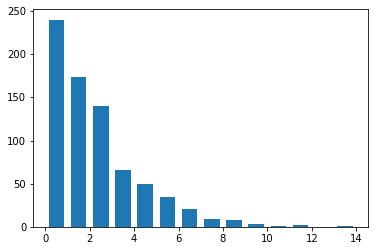

In [24]:
# how close are the predictions?
from sklearn import metrics
print("r2:", metrics.r2_score(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))


# how many under 1 min, 3 mins?
#predDifferences = abs(y_pred - y_test)
#np.where(predDifferences < 3)
predDifferences = abs(np.subtract(y_pred, y_test).ravel())
print("Fraction < 1min:", len(np.where(predDifferences < 1)[0]) / len(y_test))
print("Fraction < 3min:", len(np.where(predDifferences < 3)[0]) / len(y_test))

# distributions
hist, bins = np.histogram(predDifferences, bins=range(0,15,1))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)

# Deployment
One example! We might just pass the model configuration details (type, hyperparameters etc.) to a software developer who will integrate with a bigger system.

In [25]:
# save model
import pickle
pickle.dump(rf, open("savedmodel.sav", 'wb'))

# some time later...
# load the model from disk
rf2 = pickle.load(open("savedmodel.sav", 'rb'))
pred = rf2.predict(X_test)

# ....The End